In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [ ]:
x, y = sklearn.datasets.make_moons(200, noise = 0.20)

In [ ]:
plt.scatter(x[:, 0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

Convert Dataset into torch tensor

In [ ]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

Building NN

In [13]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

Create an Object of that class and def. Optimization and Loss func

In [14]:
# Create an Object of that class
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

# Optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=0.02)

# Loss Function
loss_function = nn.CrossEntropyLoss()

Training & Visualising

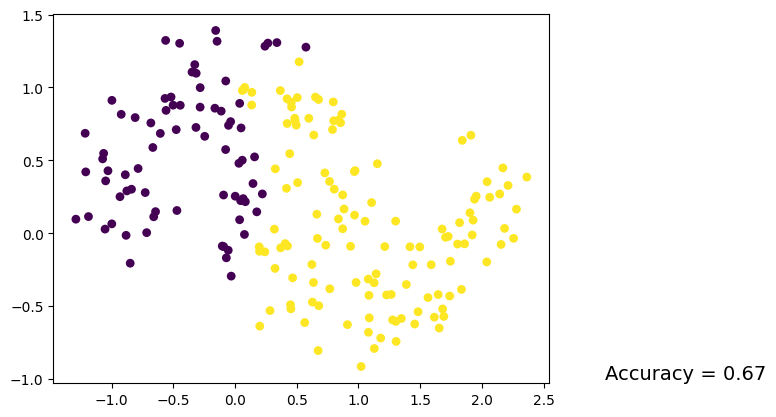

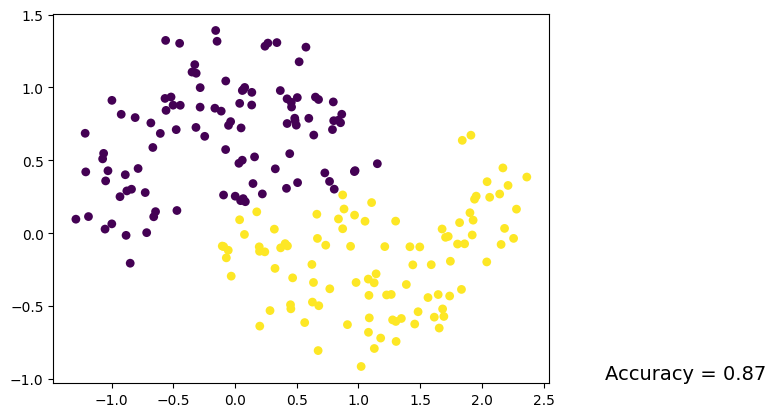

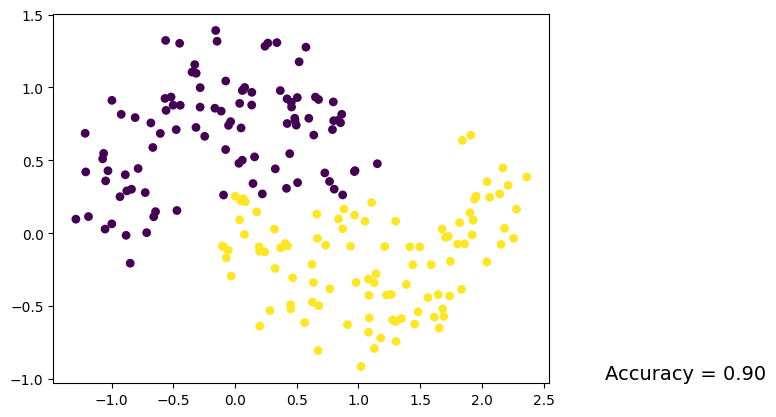

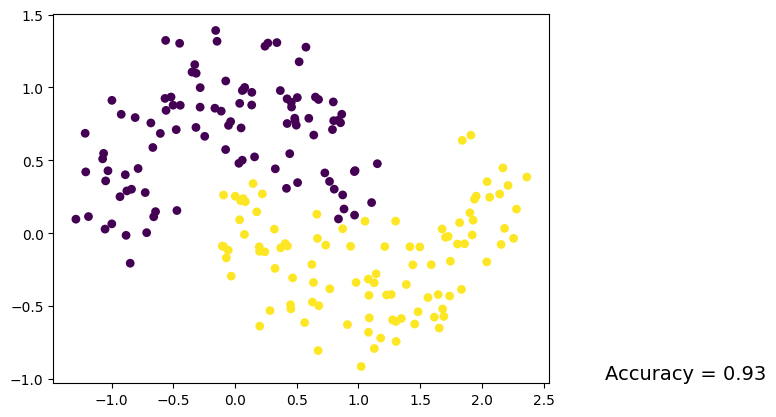

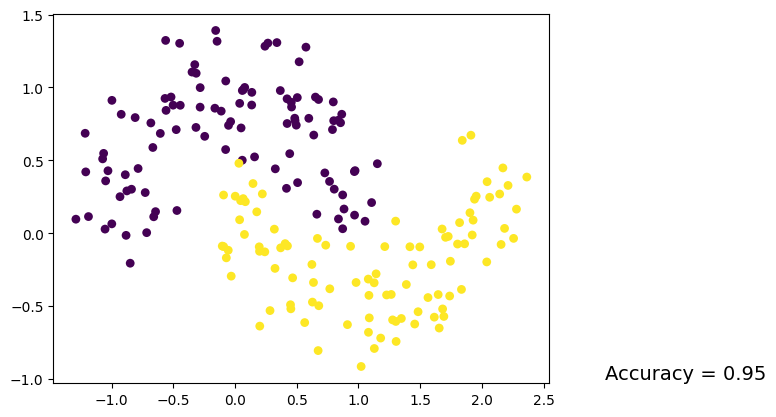

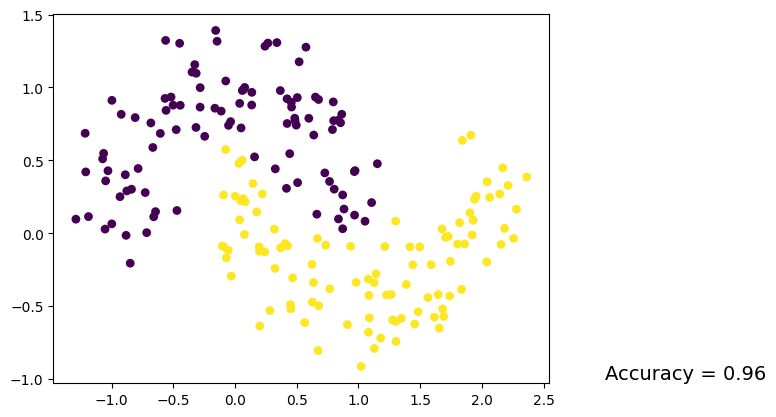

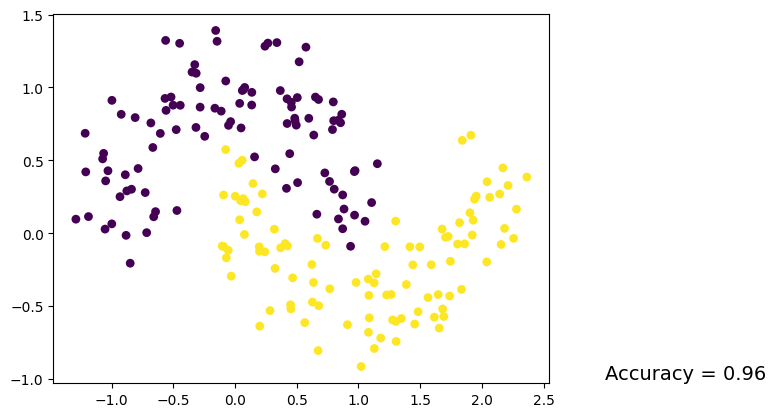

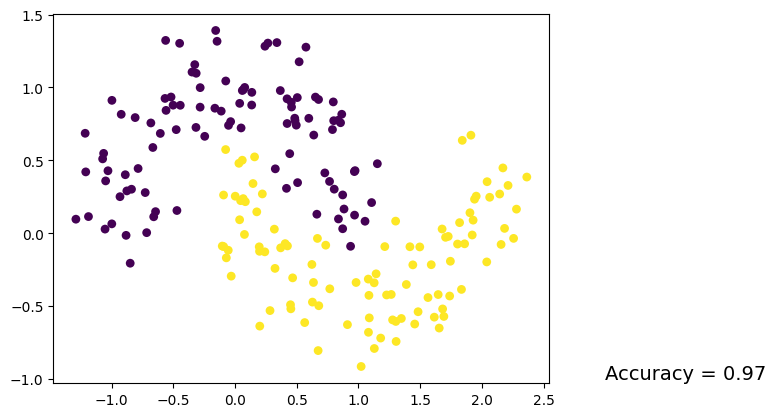

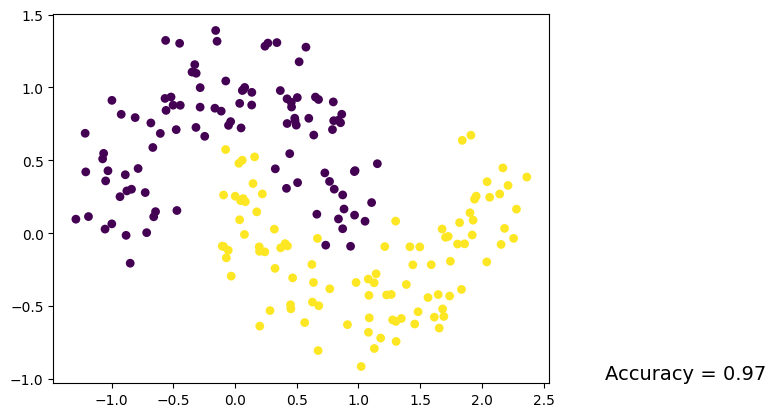

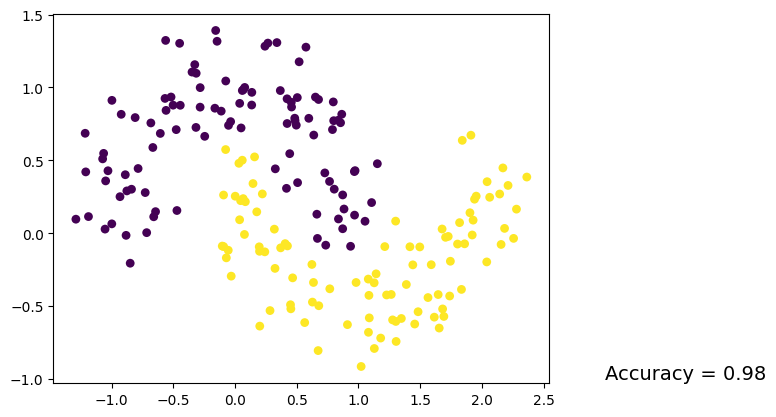

In [19]:
plt.ion()
for epoch in range(10000):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
         # show the learning process up until now
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()        
plt.show()